In [61]:
!nvidia-smi

'nvidia-smi' is not recognized as an internal or external command,
operable program or batch file.


In [62]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [63]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [64]:
ROOT_PATH = "flowers"

In [65]:
!pwd

/d/PROJECT/PYTHON/KLASIFIKASI/flowers


In [66]:
import os
os.chdir(ROOT_PATH)
os.getcwd()

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'flowers'

In [67]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'flowers/train'
valid_path = 'flowers/validation'


In [68]:
# Import the VGG16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


In [69]:
# don't train existing weights
for layer in vgg16.layers:
  print(layer)

<InputLayer name=input_layer_2, built=True>
<Conv2D name=block1_conv1, built=True>
<Conv2D name=block1_conv2, built=True>
<MaxPooling2D name=block1_pool, built=True>
<Conv2D name=block2_conv1, built=True>
<Conv2D name=block2_conv2, built=True>
<MaxPooling2D name=block2_pool, built=True>
<Conv2D name=block3_conv1, built=True>
<Conv2D name=block3_conv2, built=True>
<Conv2D name=block3_conv3, built=True>
<MaxPooling2D name=block3_pool, built=True>
<Conv2D name=block4_conv1, built=True>
<Conv2D name=block4_conv2, built=True>
<Conv2D name=block4_conv3, built=True>
<MaxPooling2D name=block4_pool, built=True>
<Conv2D name=block5_conv1, built=True>
<Conv2D name=block5_conv2, built=True>
<Conv2D name=block5_conv3, built=True>
<MaxPooling2D name=block5_pool, built=True>


In [70]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [71]:
for layer in vgg16.layers:
  print(layer.name,layer.trainable)

input_layer_2 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [72]:
vgg16.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [73]:
  # useful for getting number of output classes
folders = glob('flowers/train/*')

In [74]:
folders

[]

In [75]:
len(folders)

0

In [76]:
model = Sequential()

model.add(vgg16)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(5,activation='softmax'))

In [77]:
# view the structure of the model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,138,757 (80.64 MB)

 Trainable params: 6,424,069 (24.51 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [78]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [79]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [80]:
!pwd

/d/PROJECT/PYTHON/KLASIFIKASI/flowers


In [36]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('D:/PROJECT/PYTHON/KLASIFIKASI/flowers/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 600 images belonging to 5 classes.


In [37]:
test_set = test_datagen.flow_from_directory('D:/PROJECT/PYTHON/KLASIFIKASI/flowers/validation',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 300 images belonging to 5 classes.


In [38]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

c:\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 108s 6s/step - accuracy: 0.2835 - loss: 5.6434 - val_accuracy: 0.5167 - val_loss: 1.2275
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 118s 6s/step - accuracy: 0.6041 - loss: 0.9828 - val_accuracy: 0.7267 - val_loss: 0.8375
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 120s 6s/step - accuracy: 0.8621 - loss: 0.4527 - val_accuracy: 0.7533 - val_loss: 0.7313
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 131s 7s/step - accuracy: 0.8769 - loss: 0.3854 - val_accuracy: 0.7400 - val_loss: 0.8262
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 139s 7s/step - accuracy: 0.8830 - loss: 0.3443 - val_accuracy: 0.7700 - val_loss: 0.7616
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 138s 7s/step - accuracy: 0.9129 - loss: 0.2599 - val_accuracy: 0.7667 - val_loss: 0.7201
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 137s 7s/step - accuracy: 0.9522 - loss: 0.1861 - val_accuracy: 0.7633 - val_loss: 0.7327
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 140s 7s/step - accuracy: 0.9828 - loss: 0.1403 - val_accuracy: 0.7633 - v

In [45]:
import matplotlib.pyplot as plt

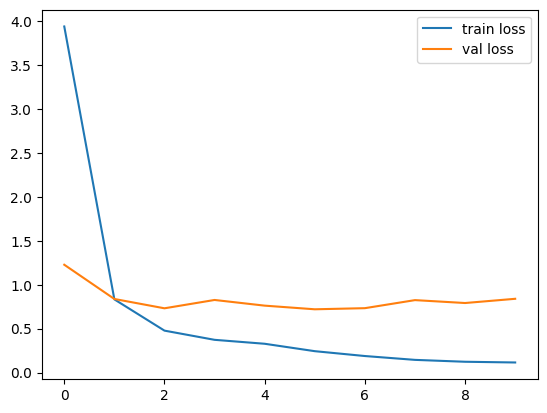

<Figure size 640x480 with 0 Axes>

In [47]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

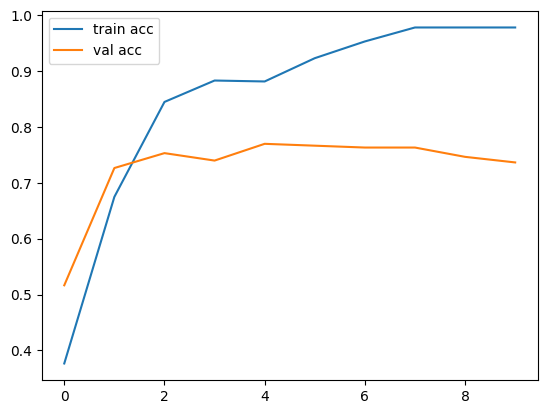

<Figure size 640x480 with 0 Axes>

In [51]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [52]:
# save it as a h5 file
from tensorflow.keras.models import load_model

model.save('model_vgg16.h5')

In [43]:
y_pred = model.predict(test_set)

10/10 ━━━━━━━━━━━━━━━━━━━━ 34s 3s/step


In [50]:
y_pred

array([[1.3856889e-03, 2.4564546e-03, 1.6418185e-04, 9.5929962e-01,
        3.6694162e-02],
       [2.7890002e-05, 1.5407346e-05, 2.0413148e-07, 9.9979347e-01,
        1.6312115e-04],
       [1.2888283e-01, 1.9668607e-02, 5.0487902e-02, 4.4583994e-01,
        3.5512066e-01],
       ...,
       [9.8776603e-01, 7.3636265e-04, 6.4668188e-06, 9.8448908e-03,
        1.6462655e-03],
       [5.1413190e-01, 1.0171411e-02, 1.8115977e-02, 2.7092502e-01,
        1.8665573e-01],
       [1.6260965e-03, 1.0863226e-05, 7.5240952e-01, 2.0641582e-04,
        2.4574707e-01]], dtype=float32)

In [31]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [32]:
y_pred

array([2, 0, 1, 4, 2, 2, 0, 2, 2, 2, 4, 4, 3, 0, 0, 0, 2, 2, 2, 2, 2, 1,
       0, 2, 0, 2, 2, 0, 3, 0, 2, 3, 3, 2, 2, 2, 0, 0, 2, 2, 2, 4, 2, 1,
       3, 2, 1, 1, 4, 2, 4, 1, 1, 3, 4, 0, 4, 0, 2, 4, 3, 1, 1, 3, 0, 0,
       1, 4, 3, 2, 2, 4, 4, 4, 2, 0, 3, 2, 1, 2, 1, 1, 2, 3, 3, 2, 1, 2,
       0, 4, 3, 2, 4, 4, 2, 0, 1, 2, 2, 2, 2, 2, 2, 3, 2, 0, 4, 4, 1, 3,
       4, 4, 1, 2, 1, 2, 2, 4, 2, 0, 1, 2, 0, 1, 1, 0, 2, 0, 1, 1, 4, 0,
       2, 2, 4, 0, 4, 1, 3, 2, 4, 0, 1, 2, 3, 1, 1, 2, 2, 1, 4, 4, 1, 1,
       0, 2, 0, 1, 4, 4, 2, 4, 2, 4, 0, 0, 2, 3, 4, 4, 3, 2, 2, 1, 2, 1,
       1, 2, 1, 1, 1, 2, 1, 4, 1, 3, 0, 1, 2, 0, 4, 2, 2, 4, 0, 2, 1, 4,
       2, 2, 1, 3, 4, 4, 1, 2, 4, 2, 0, 2, 3, 4, 0, 1, 4, 3, 0, 3, 2, 2,
       4, 3, 1, 3, 0, 2, 0, 0, 2, 3, 2, 2, 0, 4, 2, 3, 2, 1, 4, 4, 1, 0,
       4, 1, 2, 2, 3, 4, 4, 3, 2, 2, 2, 1, 4, 0, 0, 3, 4, 2, 4, 4, 2, 2,
       2, 2, 3, 1, 3, 0, 4, 3, 0, 0, 2, 1, 1, 2, 0, 3, 3, 2, 4, 1, 4, 1,
       3, 4, 1, 0, 1, 3, 2, 2, 1, 2, 4, 1, 2, 2])

In [33]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_vgg16.h5')

In [ ]:
img=image.load_img('tulip.jpg',target_size=(224,224))

In [ ]:
x=image.img_to_array(img)
x

In [ ]:
Z = plt.imread('tulip.jpg')
plt.imshow(Z)

In [ ]:
x.shape

In [ ]:
x=x/255

In [ ]:
from keras.applications.vgg16 import preprocess_input

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

In [ ]:
model.predict(img_data)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)